# Dimension adaptive quadrature algorithm - latest version

## Preamble

## Settings etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chaospy as ch
from scipy import integrate
import pandas as pd
from mpl_toolkits import mplot3d
import time
import json
import pickle
from IPython.display import Image
import pandas as pd
import datetime
import numpoly
from itertools import product
from collections import OrderedDict
from os import PathLike
import re
import os

##SALib
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

#Chaospy
import chaospy as ch


In [10]:
def c(s):
    os.chdir(s)
    
def get():
    return os.getcwd()

In [13]:
c('progression')
get()

'C:\\Users\\jeffr\\OneDrive\\Documents\\Education\\Thesis\\Scripts\\Experiment 1 - LVM\\data\\new\\gt\\progression'

In [ ]:
OneDrive/Documents/Education/Thesis/Scripts/Experiment 1 - LVM/data/new/gt

In [15]:
gt_prey = pd.read_csv('pop_910_32800_2022-03-25.csv',index_col=['type','params']).loc['prey','ST']
gt_norm = np.linalg.norm(gt_prey)

## Settings etc


In [3]:

#Parameters & initial_conditions


t = np.linspace(0., 30, 1000)

#Model

def lotka(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

#Parameter space

problem = {
    'num_vars': 4,
    'names': ['alpha','beta','delta','gamma'],
    'bounds': [[0.44,0.68],
               [0.02,0.044],
               [0.71,1.15],
               [0.0226,0.0354]]
}

##Parameters
alpha = ch.Uniform(0.44, 0.68) #We choose uniform distributions to reflect our lack of knowledge about the relative likelihood functions
beta = ch.Uniform(0.02, 0.044) #We take the same bounds as for the Sobol-Saltelli analysis
delta = ch.Uniform(0.71, 1.15)
gamma = ch.Uniform(0.0226, 0.0354)

joint = ch.J(alpha,beta,delta,gamma) #The input paramter distributions are assumed to be independent so we may easily construct the joint input probability distribution.

##Expansion
expansion = ch.generate_expansion(2, joint) #Here we generate the polynomial expansion which is truncated a maximum mixed order of 2.




polynomial([1.0, q3-0.028999999999999998, q2-0.9299999999999999, q1-0.032,
            q0-0.56, q3**2-0.057999999999999996*q3+0.0008273466666666665,
            q2*q3-0.9299999999999999*q3-0.028999999999999998*q2+0.026969999999999997,
            q2**2-1.8599999999999999*q2+0.8487666666666666,
            q1*q3-0.032*q3-0.028999999999999998*q1+0.000928,
            q1*q2-0.032*q2-0.9299999999999999*q1+0.029759999999999998,
            q1**2-0.064*q1+0.000976,
            q0*q3-0.56*q3-0.028999999999999998*q0+0.01624,
            q0*q2-0.56*q2-0.9299999999999999*q0+0.5208,
            q0*q1-0.56*q1-0.032*q0+0.017920000000000002,
            q0**2-1.12*q0+0.3088])

## Grid and weight look-up table constructor

In [4]:
#alpha = ch.Uniform(0,1) #We choose uniform distributions to reflect our lack of knowledge about the relative likelihood functions
#beta = ch.Uniform(0,1) #We take the same bounds as for the Sobol-Saltelli analysis
#delta = ch.Uniform(0,1)
#gamma = ch.Uniform(0,1)
#joint = ch.J(alpha,beta,delta,gamma)


growth=None
recurrence_algorithm='stieltjes'
rule='g'
tolerance=1e-10
scaling=3
n_max=50000

def _construct_lookup(
        orders,
        dists,
        growth,
        recurrence_algorithm,
        rules,
        tolerance,
        scaling,
        n_max,
):
    """
    Create abscissas and weights look-up table so values do not need to be
    re-calculatated on the fly.
    """
    x_lookup = []
    w_lookup = []

    for order, dist in zip(max_order_vector, dists):
        print(dist)
        x_lookup.append([])
        w_lookup.append([])
        for orderr in range(max_order+1):
            (abscissas,), weights = ch.generate_quadrature(
                order=orderr,
                dist=dist,
                growth=growth,
                recurrence_algorithm=recurrence_algorithm,
                rule=rule,
                tolerance=tolerance,
                scaling=scaling,
                n_max=n_max,
            )
            x_lookup[-1].append(abscissas)
            w_lookup[-1].append(weights)
    return x_lookup, w_lookup


def construct_wrapper(maxx):
    global max_order_vector,max_order
    global x_lookup,w_lookup
    
    max_order = maxx
    max_order_vector = max_order*np.ones(len(joint), dtype=int)
    #print(max_order_vector)
    
    
    x_lookup, w_lookup = _construct_lookup(
        orders=max_order_vector,
        dists=joint,
        growth=growth,
        recurrence_algorithm=recurrence_algorithm,
        rules=rule,
        tolerance=tolerance,
        scaling=scaling,
        n_max=5000)
    
    
    return x_lookup,w_lookup
    
    
construct_wrapper(20)

Uniform(lower=0.44, upper=0.68)
Uniform(lower=0.02, upper=0.044)
Uniform(lower=0.71, upper=1.15)
Uniform(lower=0.0226, upper=0.0354)


([[array([0.56]),
   array([0.49071797, 0.62928203]),
   array([0.4670484, 0.56     , 0.6529516]),
   array([0.45666364, 0.51920227, 0.60079773, 0.66333636]),
   array([0.45125842, 0.49538368, 0.56      , 0.62461632, 0.66874158]),
   array([0.44810366, 0.48065487, 0.5313657 , 0.5886343 , 0.63934513,
          0.67189634]),
   array([0.44610705, 0.47101626, 0.51129858, 0.56      , 0.60870142,
          0.64898374, 0.67389295]),
   array([0.44476522, 0.46440002, 0.49693611, 0.53798784, 0.58201216,
          0.62306389, 0.65559998, 0.67523478]),
   array([0.44382077, 0.45967627, 0.48639543, 0.52108959, 0.56      ,
          0.59891041, 0.63360457, 0.66032373, 0.67617923]),
   array([0.44313122, 0.4561924 , 0.47847085, 0.50799255, 0.54213508,
          0.57786492, 0.61200745, 0.64152915, 0.6638076 , 0.67686878]),
   array([0.44261256, 0.45355249, 0.47238176, 0.49770846, 0.52765482,
          0.56      , 0.59234518, 0.62229154, 0.64761824, 0.66644751,
          0.67738744]),
   array([0.442

## Grid and weight constructor

In [7]:


def grid_constructor(current_index):
    
    nodestack = []
    
    if (type(current_index) == tuple):
        current_index = current_index[0]
    else:
        current_index = current_index
        
    if np.any([ i >= (len(x_lookup[0]) - 1) for i in current_index] ):
        construct_wrapper(len(x_lookup[0]) + 10)
        
    
    for index,element in enumerate(current_index):
        nodestack.append([])
        nodestack[index] = list(x_lookup[index][element])
    
    global master,final_nodes
    master = []
    nodes = nodestack[0]
    
    for i in range(1,len(nodestack)):
        nodes = product(nodes,nodestack[i])
    
    master = [(a,b,c,d) for (((a,b),c),d) in nodes]
    
    final_nodes = np.array([element for element in master]).T
    
    return final_nodes

def weight_constructor(current_index):
    
    global new_nodes
    
    nodestack = []
    new_nodes = []
    
    
    if(type(current_index) == tuple):
        current_index = current_index[0]
    else:
        current_index = current_index
        
    for index,element in enumerate(current_index):
        nodestack.append([])
        nodestack[index] = list(w_lookup[index][element])
    
    global master_1,final_weights,weights
    master_1 = []
    weights = nodestack[0]
    
    for i in range(1,len(nodestack)):
        weights = product(weights,nodestack[i])
    
    
    master_1 = [(a,b,c,d) for (((a,b),c),d) in weights]
    
    for i,el in enumerate(master_1):
        psum = 1
        for ex in el:
            psum *= ex
        new_nodes.append(psum)
    
    final_weights = new_nodes
    return final_weights

    



## Solver

In [8]:
def new_solver(final_nodes,final_weights,P):
    
    global expansion,algorithm_evals
    
    expansion = ch.generate_expansion(P, joint)
    
    start_time = time.perf_counter()
    
    global Y,fitter_prey,solution,prey
                                                                         #Choose 1000 parameter samples at which to solve for coefficients
    Y = np.zeros((2, len(final_weights)))
     
    x0 = 33                                                               #Initial conditions same as before
    y0 = 6.2                       
    X = [x0,y0]
    t = np.linspace(0., 30, 1000)
    
    for i,ex in enumerate(final_nodes.T):
        a,b,d,g = ex
        solution = integrate.odeint(lotka, X, t, args = (a,b,d,g))
        Y[0][i] =  solution.T[0][910]
        Y[1][i] =  solution.T[1][910]
    
    prey = Y[0]
    
    fitter_prey = ch.fit_quadrature(expansion,final_nodes,final_weights,prey)

    return fitter_prey
 

In [34]:

def algorithm(P):
    
    global old, active, poly, indices_list, global_errors, points,p
    global old_node_set, old_weight_set, step, vectors, df
    
    '''Initialise'''
    
    seed = (np.array([2,2,1,1], dtype = 'int'),0)
    vectors = np.identity(len(joint), dtype='int')
    date_today = datetime.date.today()
    start_time = time.perf_counter()
    samples = saltelli.sample(problem, 512)
    step = 0
    points = 0
    
    old = []
    active = []
    poly = []
    local_errors = []
    global_errors = []
    p = []
    
    old_node_set = np.array([])
    old_weight_set = np.array([])
    
    df = pd.DataFrame(columns=['chosen_index','local_error','global_error','run_time'])
    df_indices = pd.DataFrame(columns=['alpha','beta','delta','gamma'])
    
    
    # Temporary data saving
    active_indices = {}
    
    
    '''Execute zeroth step'''
    
    active.append(seed)
    active_indices[step] = active
    old_node_set = grid_constructor(seed)
    old_weight_set = weight_constructor(seed)
    print(len(old_weight_set))
    points += len(old_weight_set)
    p.append(points)
    
    poly.append(new_solver(old_node_set, old_weight_set, P))
    
    st = ch.Sens_t(poly[-1],joint)
    df_indices = df_indices.append({'alpha' : st[0], 'beta': st[1], 'delta': st[2], 'gamma': st[3] },ignore_index = True )

    
    global_errors.append(sobol_error(st))
    global_errors.append(sobol_error(st))
    
    
    print('Global error >>>', global_errors[-1])
    print('Step time >>>', time.perf_counter() - start_time, 'seconds')
    
    '''Main loop'''
    
    while (global_errors[-1] > 0.2) and len(active) > 0:
        
        if len(active) > 1000000000:
            return

        
        else:
            
            active_indices[step] = active
            chosen_index = active[-1][0]
            local_errors.append(active[-1][1])
            active.pop()
            print('Chosen index >>>', chosen_index)

            old.append(tuple(chosen_index))
            generate_candidates(chosen_index,P)

            stripped_active = [i[0] for i in active] + [j for j in candidates]
            assign_errors(stripped_active)

            old_node_set = np.concatenate((old_node_set, grid_constructor(chosen_index)), axis = 1)
            old_weight_set = np.concatenate((old_weight_set, weight_constructor(chosen_index)))
            points += len(old_weight_set)
            p.append(points)

                        


            poly.append(new_solver(old_node_set, old_weight_set,P))
            st = ch.Sens_t(poly[-1], joint)
            df_indices = df_indices.append({'alpha': st[0], 'beta': st[1], 'delta': st[2], 'gamma': st[3] }, ignore_index=True)

            global_errors.append(sobol_error(st))

            print('Global error >>>', global_errors[-1])

            '''Save data'''

            numpoly.savez(f'{date_today}_step{step}.npz',*poly)
            run_time = time.perf_counter() - start_time
            df = df.append({'chosen_index': old[-1],'local_error':local_errors[-1],'global_error':global_errors[-1], 'run_time':run_time}, ignore_index=True)
            df.to_csv(f'comma_file_{date_today}.csv')
            df_indices.to_csv('total_order_indices.csv')

            print('Step time >>>', time.perf_counter() - start_time, 'seconds')

            step += 1
        
def assign_errors(param):
    
    global active_errors,active,candidates,current_errors,new
    active_errors = []
    

    for multi_index in param:
        nodes = grid_constructor(multi_index)
        current_errors = []
        
        for node in nodes.T:
            a,b,d,g = node
            solution = integrate.odeint(lotka, (33,6.2), t, args = (a,b,d,g)).T[0][910]
            current_errors.append(abs(solution - poly[-1](a,b,d,g)))
        
        active_errors.append(np.mean(current_errors))
           
    
    active = sorted(list(zip(param,active_errors)),key = lambda x: x[1])
    active = [i for i in OrderedDict((tuple(x[0]), x) for x in active).values()]
    #print(active)
    
    
def calculate_global_error(polynomial,samples):
    
    global global_error
    
    current_errors = []
    
    for idx,node in enumerate(samples):
        a,b,d,g = node
        current_errors.append(abs(evals[idx] - polynomial(a,b,d,g)))
    
    global_error = np.mean(current_errors)
    
    return global_error   

def sobol_error(vec):
    
    return np.linalg.norm(gt_prey - vec) / gt_norm
    
def model_evals(samples):
    
    evals_list = []
    
    for idx,node in enumerate(samples):
        a,b,d,g = node
        solution = integrate.odeint(lotka, (33,6.2), t, args = (a,b,d,g)).T[0][910]
        evals_list.append(solution)
        
    evals = np.array(evals_list)
    
    return evals

def generate_candidates(index_set,P):
    global candidates,pre_candidates,back_neighbours
    
    pre_candidates = []
    candidates = []
    new = []
    
    for j in range(0,len(joint)):
        pre_candidates.append(index_set + vectors[j])
    
    for candidate in pre_candidates:
        back_neighbours = []
        for j in range(0,len(joint)):
            back_neighbour = candidate-vectors[j]
            if np.all((back_neighbour > 1)):
                back_neighbours.append(tuple(back_neighbour))
    
        if np.all([neighbour in old for neighbour in back_neighbours]):    
            candidates.append(candidate)
            
        for multi_index in candidates:
            if np.all([i<P+1 for i in multi_index]):
                new.append(multi_index)
                
                
    candidates = new
                
    
    
        

algorithm(3)

36
Global error >>> 0.6608124633355859
Step time >>> 5.23735459999989 seconds
Chosen index >>> [2 2 1 1]
Global error >>> 0.6608124633496135
Step time >>> 13.525167499999952 seconds
Chosen index >>> [2 2 2 1]
Global error >>> 1.2981023671057872
Step time >>> 24.4788681 seconds
Chosen index >>> [2 2 3 1]
Global error >>> 1.297734084575294
Step time >>> 36.769545399999515 seconds
Chosen index >>> [2 2 1 2]
Global error >>> 1.3871915663443222
Step time >>> 50.759039599999596 seconds
Chosen index >>> [2 2 1 3]
Global error >>> 1.387171863131299
Step time >>> 67.05051479999929 seconds
Chosen index >>> [2 3 2 1]
Global error >>> 1.079176810578499
Step time >>> 81.54243319999932 seconds
Chosen index >>> [2 3 1 3]
Global error >>> 1.079176812239542
Step time >>> 96.46294499999931 seconds
Chosen index >>> [3 2 3 1]
Global error >>> 0.18173992920861262
Step time >>> 110.83349910000015 seconds


In [23]:
len(old_weight_set)
points

2484

In [18]:
j = ch.J(alpha,beta)a

In [19]:
nodes,weights = ch.generate_quadrature(3,j,sparse=True)
print(len(weights))

29


In [61]:
xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
global_errors 


[0.6608124633355859,
 0.6608124633496135,
 1.2981023671057872,
 1.297734084575294,
 1.3871915663443222,
 1.387171863131299,
 1.079176810578499,
 1.079176812239542,
 0.18173992920861262]

In [68]:
len(p)

9

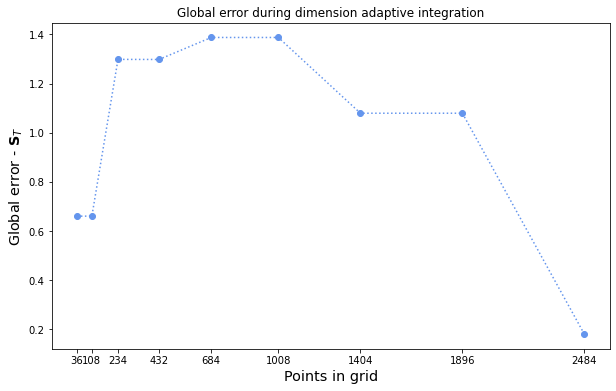

In [84]:
fig,ax = plt.subplots(figsize=(10,6))
xs = p 
ax.plot(p,global_errors,marker='o',linestyle = ':',color='cornflowerblue')
labels = p
ax.set_xlabel('Points in grid',fontsize='x-large')
ax.set_ylabel(r'Global error - $ \mathbf{S}_{T} $',fontsize='x-large')
ax.set_title('Global error during dimension adaptive integration')
x = [i for i in p]
ax.set_xticks(x)
plt.savefig('DAS_error.jpg',bbox_inches='tight',dpi=200)

In [85]:
old_node_set

array([[0.4670484 , 0.4670484 , 0.4670484 , ..., 0.66333636, 0.66333636,
        0.66333636],
       [0.02270484, 0.02270484, 0.02270484, ..., 0.04129516, 0.04129516,
        0.04129516],
       [0.80298294, 0.80298294, 1.05701706, ..., 1.00479583, 1.11944999,
        1.11944999],
       [0.02530496, 0.03269504, 0.02530496, ..., 0.03269504, 0.02530496,
        0.03269504]])

In [101]:
one.shape

(1, 588)

In [102]:
one = old_node_set[0:2]
two = old_node_set[2:4]

In [83]:
c('midterm_meeting_figures')
get()

'C:\\Users\\jeffr\\OneDrive\\Documents\\Education\\Thesis\\Scripts\\midterm_meeting_figures'

In [93]:
two[0]

array([0.80298294, 0.80298294, 1.05701706, 1.05701706, 0.80298294,
       0.80298294, 1.05701706, 1.05701706, 0.80298294, 0.80298294,
       1.05701706, 1.05701706, 0.80298294, 0.80298294, 1.05701706,
       1.05701706, 0.80298294, 0.80298294, 1.05701706, 1.05701706,
       0.80298294, 0.80298294, 1.05701706, 1.05701706, 0.80298294,
       0.80298294, 1.05701706, 1.05701706, 0.80298294, 0.80298294,
       1.05701706, 1.05701706, 0.80298294, 0.80298294, 1.05701706,
       1.05701706, 0.80298294, 0.80298294, 1.05701706, 1.05701706,
       0.80298294, 0.80298294, 1.05701706, 1.05701706, 0.80298294,
       0.80298294, 1.05701706, 1.05701706, 0.80298294, 0.80298294,
       1.05701706, 1.05701706, 0.80298294, 0.80298294, 1.05701706,
       1.05701706, 0.80298294, 0.80298294, 1.05701706, 1.05701706,
       0.80298294, 0.80298294, 1.05701706, 1.05701706, 0.80298294,
       0.80298294, 1.05701706, 1.05701706, 0.80298294, 0.80298294,
       1.05701706, 1.05701706, 0.75958873, 0.75958873, 0.93   

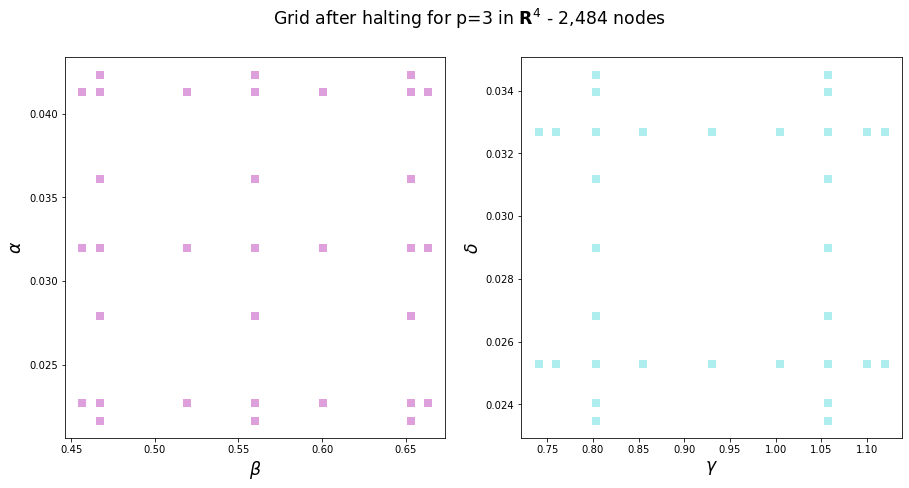

In [106]:
fig,axs = plt.subplots(1,2,figsize=(15,7))

one = old_node_set[0:2]
two = old_node_set[2:4]


axs[0].scatter(one[0],one[1], marker = 's', color='plum',linewidth=2)
axs[1].scatter(two[0],two[1],marker = 's', color='paleturquoise',linewidth=2)

axs[0].set_ylabel(r'$ \alpha $', fontsize='xx-large')
axs[1].set_ylabel(r'$ \delta $', fontsize='xx-large')

axs[0].set_xlabel(r'$ \beta $', fontsize='xx-large')
axs[1].set_xlabel(r'$ \gamma $', fontsize='xx-large')

fig.suptitle(r'Grid after halting for p=3 in $ \mathbf{R}^{4}$ - 2,484 nodes',fontsize = 'xx-large')
plt.savefig('DAS_grid_graph.jpg', bbox_inches = 'tight', dpi=200 )



In [105]:
get()

'C:\\Users\\jeffr\\OneDrive\\Documents\\Education\\Thesis\\Scripts\\midterm_meeting_figures'